<a href="https://colab.research.google.com/github/skyzinho123/t/blob/main/C%C3%B3pia_de_Titanic_preenchido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science - Titanic
 - Link da competição: https://www.kaggle.com/competitions/titanic/overview

In [ ]:
#%pip install xgboost==1.7.4 --upgrade --force-reinstall

## Importando bibliotecas

In [ ]:
import pandas as pd # Tratamento e leitura de dados
import numpy as np  # Cálculos
import seaborn as sns # Visualização de dados
import matplotlib.pyplot as plt # Visualização de dados

## Tratamento de dados

#### Lendo a base e selecionando colunas que serão usadas

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Survived']].copy()
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,female,38.0,1,0,71.2833,C85,C,1
2,3,3,female,26.0,0,0,7.9250,NaN,S,1
3,4,1,female,35.0,1,0,53.1000,C123,S,1
4,5,3,male,35.0,0,0,8.0500,NaN,S,0


#### Checando valores nulos

In [ ]:
def checa_nulos(data: pd.DataFrame):
    l = len(data)
    null_columns = {}
    for column in data.columns:
        #display(data[column])
        null_values = sum(data[column].isna())
        pct_values = (null_values / l) * 100
        null_columns[column] = pct_values

    display(pd.DataFrame(data = null_columns.values(), index = null_columns.keys(), columns = ['pct_nulls']))

In [ ]:
checa_nulos(data)

,pct_nulls
PassengerId,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,77.104377
Embarked,0.224467
Survived,0.000000


#### Preenchendo valores nulos

In [ ]:
def fill_nas(data: pd.DataFrame):
    mean_age = round(data['Age'].mean())
    data.Age = data['Age'].fillna(mean_age).copy() # Preenchendo com a média como temos ~~ 80% dos dados
    data.Cabin = data.Cabin.fillna('N').copy() # Preenchendo com uma constante como temos só ~~ 20% dos dados
    most_frequent = data.Embarked.value_counts().reset_index().max()['index']
    data.Embarked = data.Embarked.fillna('N').copy() # Preenchendo com a classe mais frequente
  fill_nas(data)
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,N,S,0
1,2,1,female,38.0,1,0,71.2833,C85,C,1
2,3,3,female,26.0,0,0,7.9250,N,S,1
3,4,1,female,35.0,1,0,53.1000,C123,S,1
4,5,3,male,35.0,0,0,8.0500,N,S,0


In [ ]:
checa_nulos(data)

,pct_nulls
PassengerId,0.0
Pclass,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Cabin,0.0
Embarked,0.0
Survived,0.0


#### Criação de variáveis

mesmo com os dados da cabine estando em maioria vazios, essa variável ainda assim carrega muita informação, como a primeira letra representa o deck que a pessoa estava, isso pode ser muito importante para a classificação pois decks mais baixos iriam inundar primeiro.

![image.png](attachment:image.png)

In [ ]:
def create_deck(data: pd.DataFrame):
    data['Deck'] = data.Cabin.str[0] # Pegando a primeira letra da cabine, que contem o Deck
create_deck(data)
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Deck
0,1,3,male,22.0,1,0,7.2500,N,S,0,N
1,2,1,female,38.0,1,0,71.2833,C85,C,1,C
2,3,3,female,26.0,0,0,7.9250,N,S,1,N
3,4,1,female,35.0,1,0,53.1000,C123,S,1,C
4,5,3,male,35.0,0,0,8.0500,N,S,0,N
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,N,S,0,N
887,888,1,female,19.0,0,0,30.0000,B42,S,1,B
888,889,3,female,30.0,1,2,23.4500,N,S,0,N
889,890,1,male,26.0,0,0,30.0000,C148,C,1,C


#### Finalizando o dataset

In [ ]:
#data.set_index('PassengerId', inplace = True)
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck', 'Survived']]
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Survived
0,3,male,22.0,1,0,7.2500,S,N,0
1,1,female,38.0,1,0,71.2833,C,C,1
2,3,female,26.0,0,0,7.9250,S,N,1
3,1,female,35.0,1,0,53.1000,S,C,1
4,3,male,35.0,0,0,8.0500,S,N,0


## Análise de dados

#### Hipóteses a serem respondidas:
- Gênero é uma variavel de impacto na sobrevivencia?
- A classe socioeconomica da pessoa impactou na sobrevivencia?
- A idade é uma variável importante na sobrevivencia?
- O deck onde a pessoa estava foi importante para a sobrevivencia?
- Qual era a distribuição de classes sociais por deck?
- A quantidade de familiares é uma variavel de impacto?
- O local de embarque afeta o rate de sobrevivencia?
- Passageiros que pagaram mais tem uma chance maior de sobreviver?

#### Gênero é uma variavel de impacto na sobrevivencia?

In [ ]:
sns.set_palette('inferno')

In [ ]:
sex_survival = data.groupby('Sex').agg(['sum', 'count'])['Survived'].reset_index()
sex_survival['rate'] = ((sex_survival['sum'] / sex_survival['count']) * 100).astype(int)
sex_survival = sex_survival[['Sex', 'rate', 'count']]
sex_survival

,Sex,rate,count
0,female,74,314
1,male,18,577


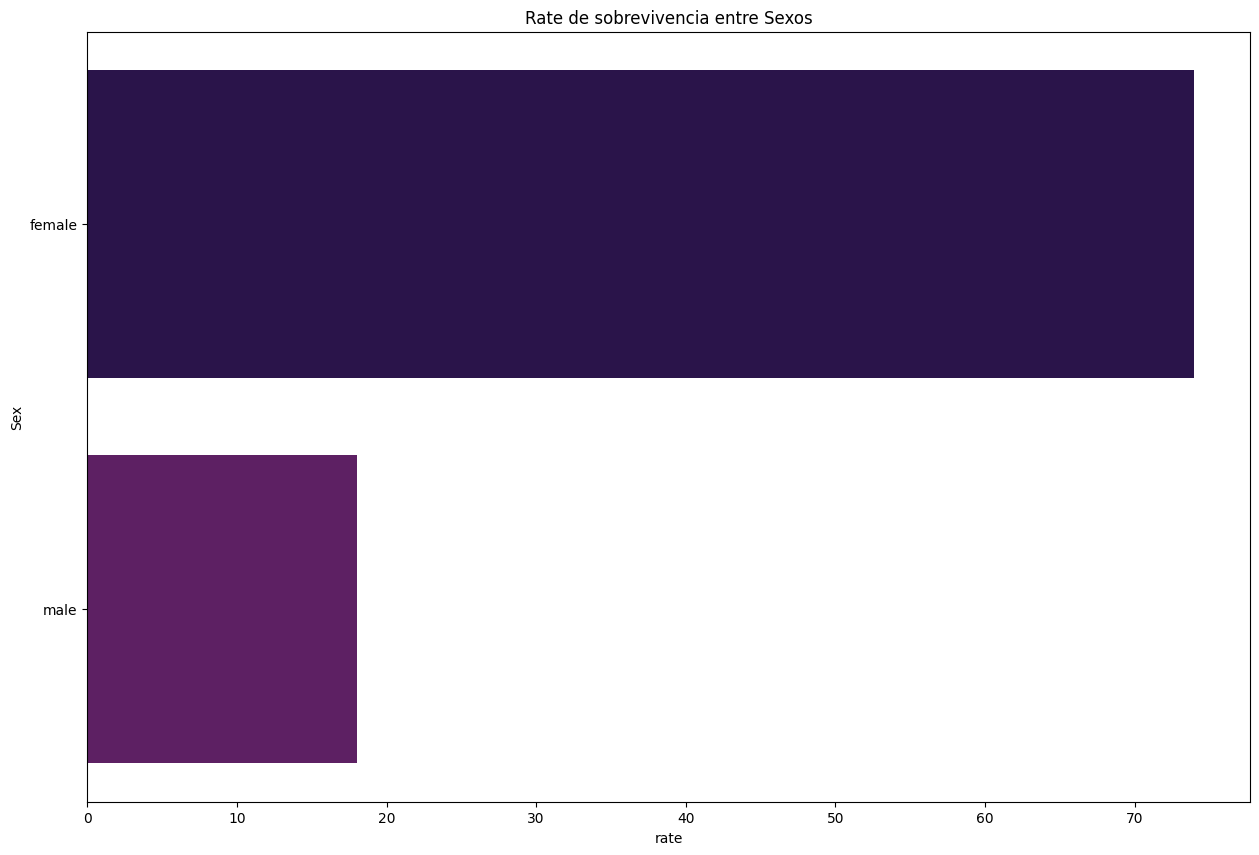

In [ ]:
plt.figure(
    figsize=(15,10)
)
ax = sns.barplot(x = 'rate', y = 'Sex', data = sex_survival);
ax.set_title('Rate de sobrevivencia entre Sexos');

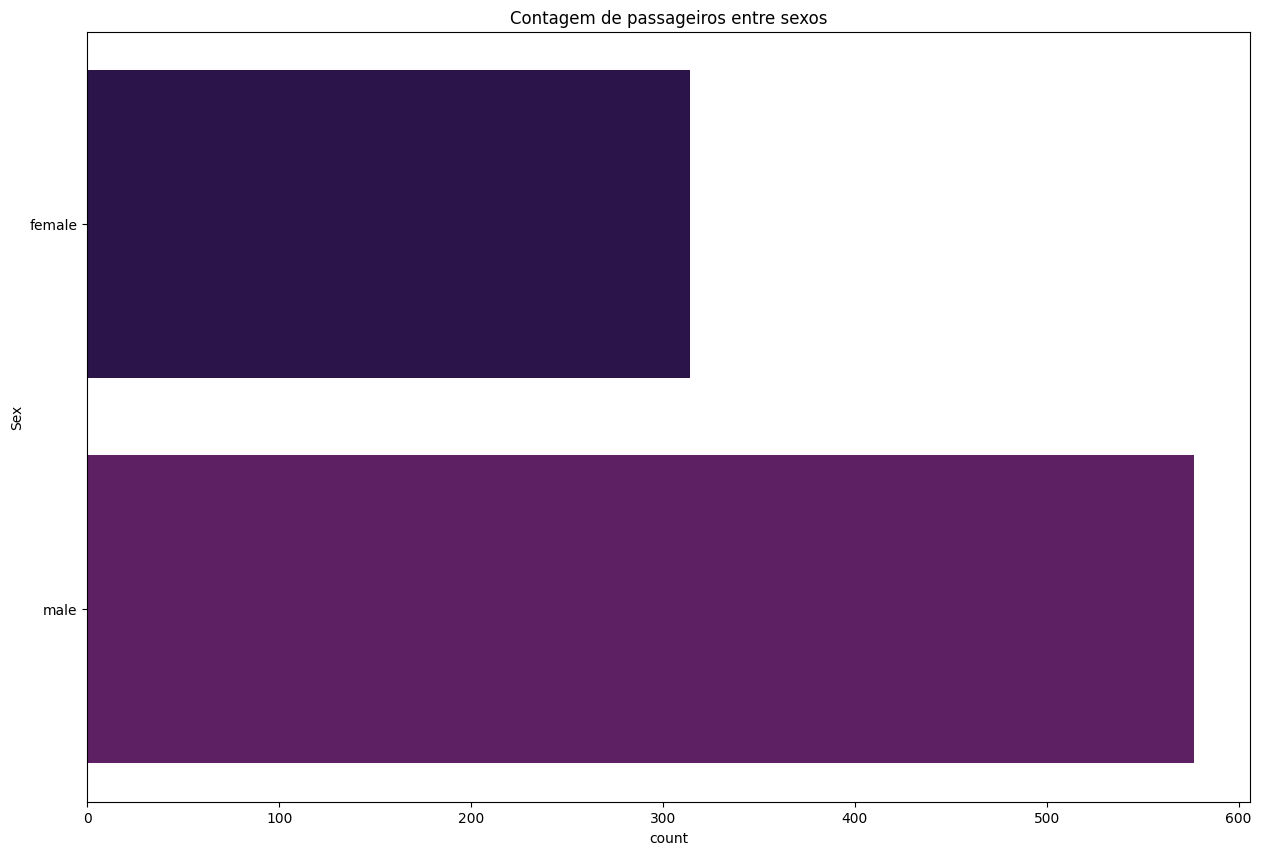

In [ ]:
plt.figure(
    figsize=(15,10)
)
ax = sns.barplot(x = 'count', y = 'Sex', data = sex_survival);
ax.set_title('Contagem de passageiros entre sexos');

Conclusão: com quase o dobro de homens na embarcação a taxa de sobrevivencia entre os homens é quase 1/4 da taxa de sobrevivencia entre mulheres

#### A classe socioeconomica da pessoa impactou na sobrevivencia?

In [ ]:
class_survival = data.groupby('Pclass').agg(['sum', 'count'])['Survived'].reset_index()
class_survival['rate'] = ((class_survival['sum'] / class_survival['count']) * 100).astype(int)
class_survival = class_survival[['Pclass', 'rate', 'count']]
class_survival

,Pclass,rate,count
0,1,62,216
1,2,47,184
2,3,24,491


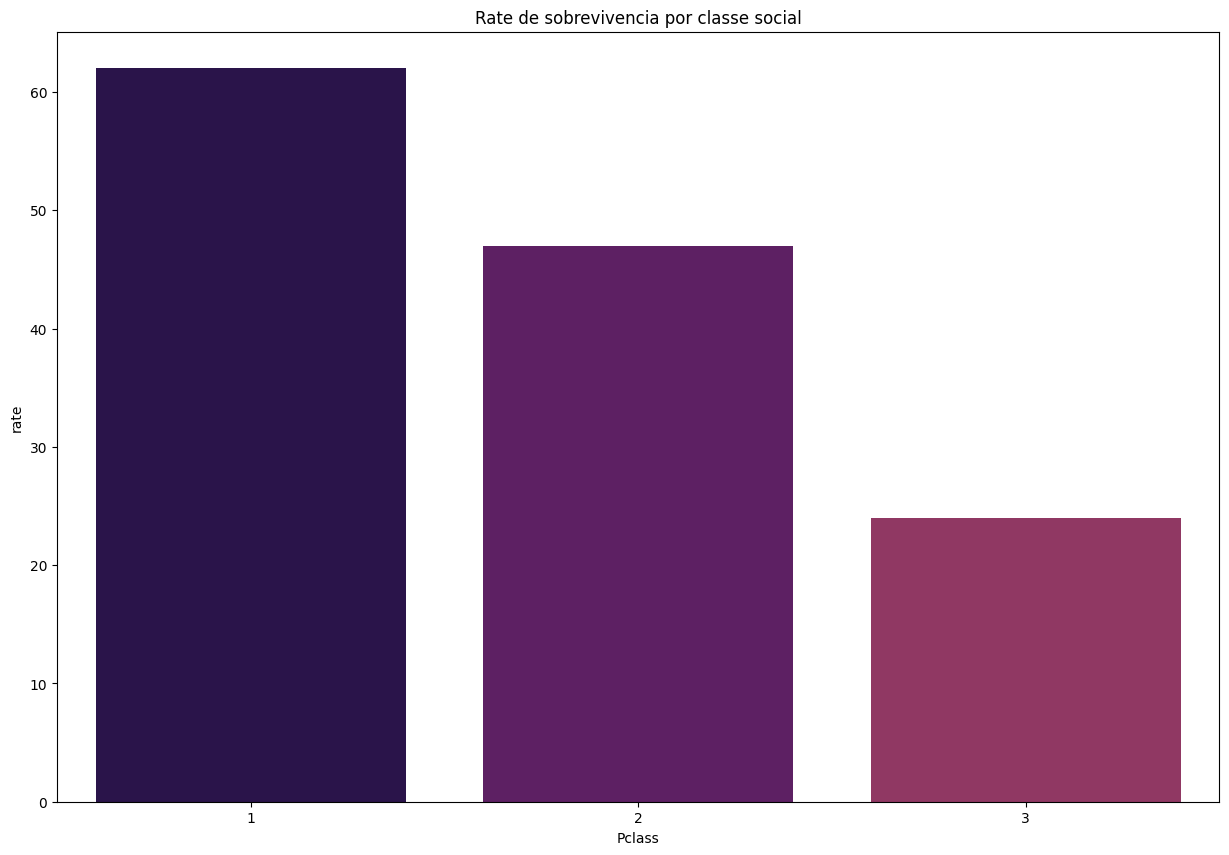

In [ ]:
plt.figure(
    figsize=(15,10)
)
ax = sns.barplot(x = 'Pclass', y = 'rate', data = class_survival);
ax.set_title('Rate de sobrevivencia por classe social');

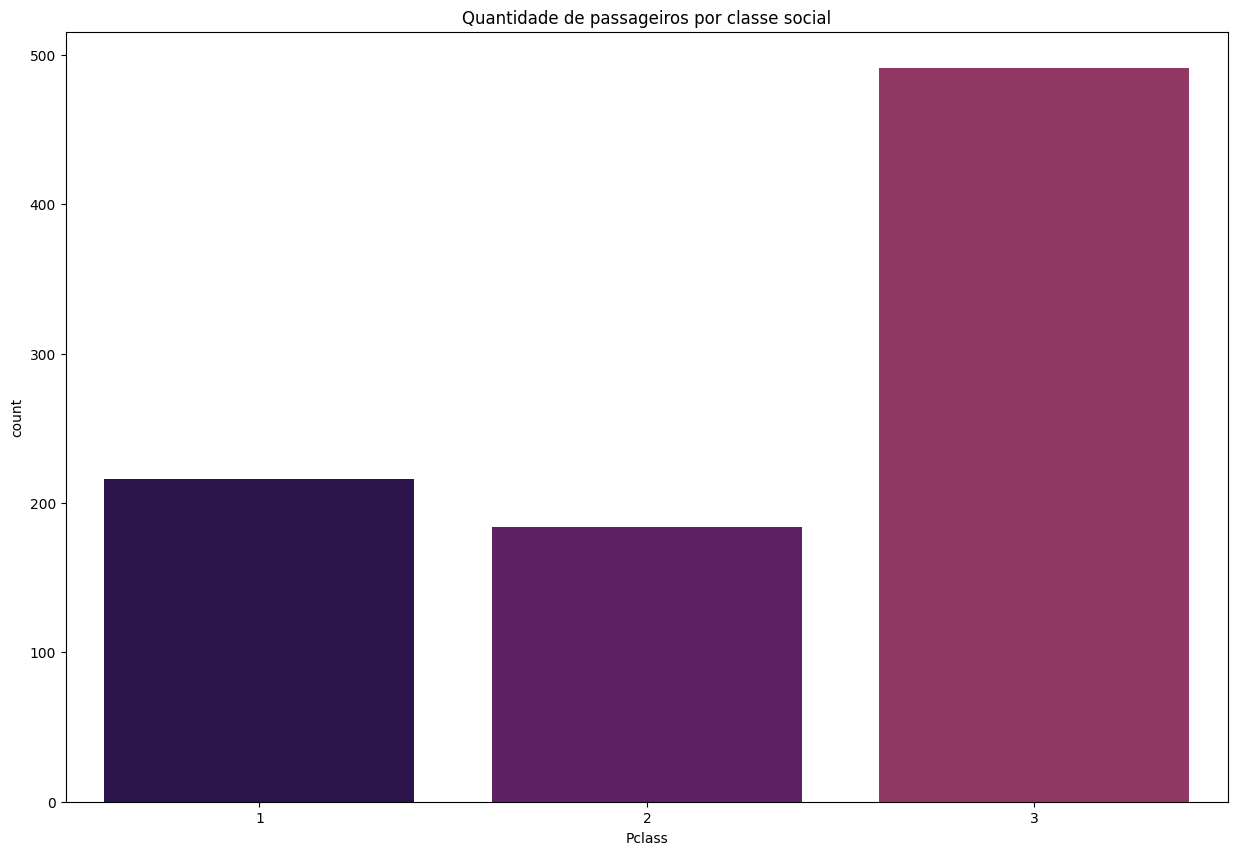

In [ ]:
plt.figure(
    figsize=(15,10)
)
ax = sns.barplot(x = 'Pclass', y = 'count', data = class_survival);
ax.set_title('Quantidade de passageiros por classe social');

Conclusão: A classe majoritaria dentro da embarcação era a terceira, porém foi também a com menos sobreviventes

#### A idade é uma variável importante na sobrevivencia?

In [ ]:
corr_idade = np.corrcoef(data.Age, data.Survived)[0][1]
print('A correlação entre as variáveis idade e sobrevivencia é: %.2f'% (corr_idade))

A correlação entre as variáveis idade e sobrevivencia é: -0.07


é possível ver que a correlação entre as duas variáveis é quase nula, porém isso ainda não me convenceu, crianças deveriam ter uma taxa de sobrevivencia maior, vamos olhar a distribuição de idades dentro da embarcação para ver se essa informação não foi perdida

##### Box Plot

![image.png](attachment:image.png)

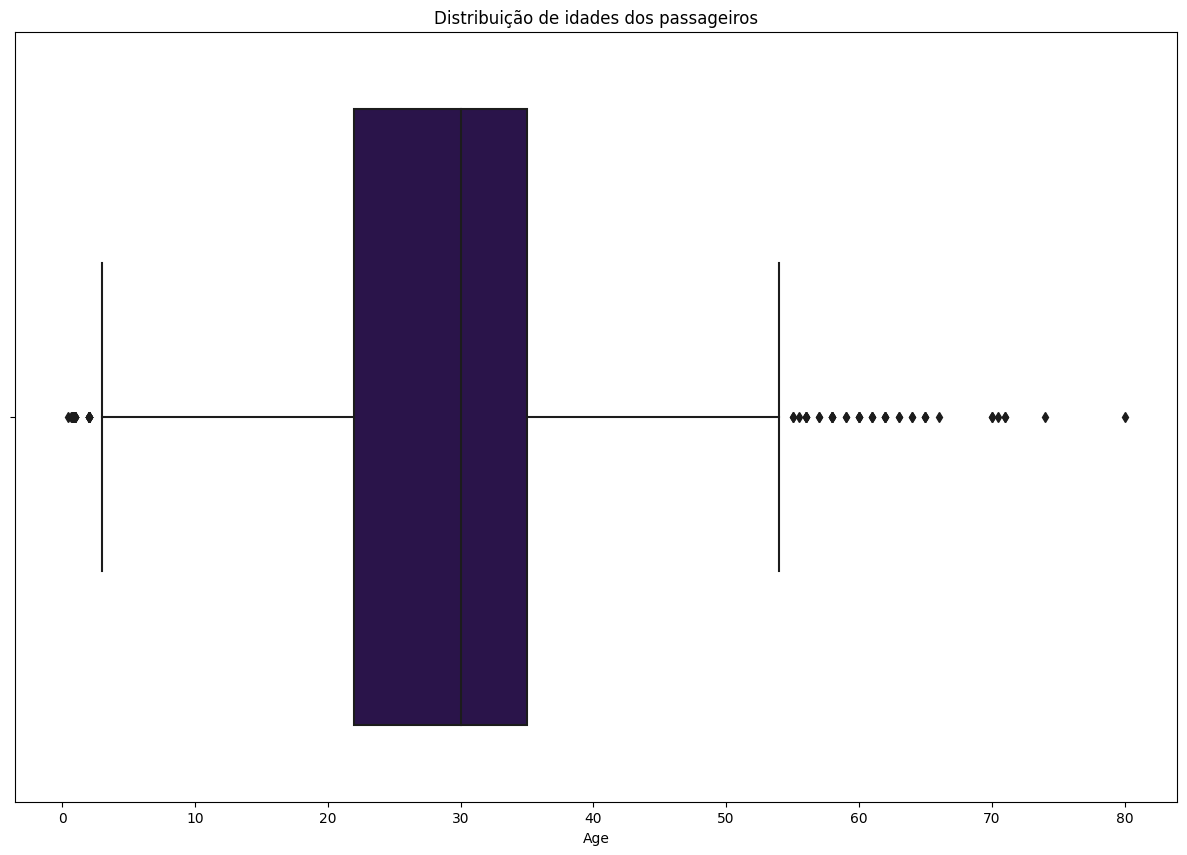

In [ ]:
plt.figure(
    figsize=(15,10)
)
ax = sns.boxplot(x = 'Age', data = data);
ax.set_title('Distribuição de idades dos passageiros');

In [ ]:
l = len(data)
pct_menor = ((data.loc[data.Age < 18].count()['Age'] / l) * 100)
print('Dentre todos os passageiros %.2f'% pct_menor, '% é menor de idade' )

Dentre todos os passageiros 12.68 % é menor de idade


Conclusão: a variável de idade tem uma correlação baixa com sobrevivencia, o que é provavelmente causado por apenas ~13% das pessoas na embarcação terem abaixo de 18 anos

#### O deck onde a pessoa estava foi importante para a sobrevivencia?

Todos os botes salva vidas se encontravam no deck A

![Titanic_Boat_Deck_plan_with_lifeboats.png](attachment:Titanic_Boat_Deck_plan_with_lifeboats.png)

##### Olhando o rate de sobrevivencia de cada Deck

In [ ]:
deck_survival = data.groupby('Deck').agg(['sum', 'count'])['Survived'].reset_index()
deck_survival = deck_survival.loc[deck_survival.Deck != 'N'].copy()
deck_survival['rate'] = (deck_survival['sum'] / deck_survival['count']) * 100
deck_survival

,Deck,sum,count,rate
0,A,7,15,46.666667
1,B,35,47,74.468085
2,C,35,59,59.322034
3,D,25,33,75.757576
4,E,24,32,75.000000
5,F,8,13,61.538462
6,G,2,4,50.000000
8,T,0,1,0.000000


##### Rate de sobrevivencia de cada deck separado pelo Sexo

In [ ]:
deck_sex_survival = data.groupby(['Deck', 'Sex']).agg(['count', 'sum'])['Survived'].reset_index().rename({'Pclass': 'count'}, axis = 1)
deck_sex_survival = deck_sex_survival.loc[deck_sex_survival['Deck'] != 'N']
deck_sex_survival['rate'] = deck_sex_survival['sum']/deck_sex_survival['count']
deck_sex_survival

,Deck,Sex,count,sum,rate
0,A,female,1,1,1.000000
1,A,male,14,6,0.428571
2,B,female,27,27,1.000000
3,B,male,20,8,0.400000
4,C,female,27,24,0.888889
5,C,male,32,11,0.343750
6,D,female,18,18,1.000000
7,D,male,15,7,0.466667
8,E,female,15,14,0.933333
9,E,male,17,10,0.588235


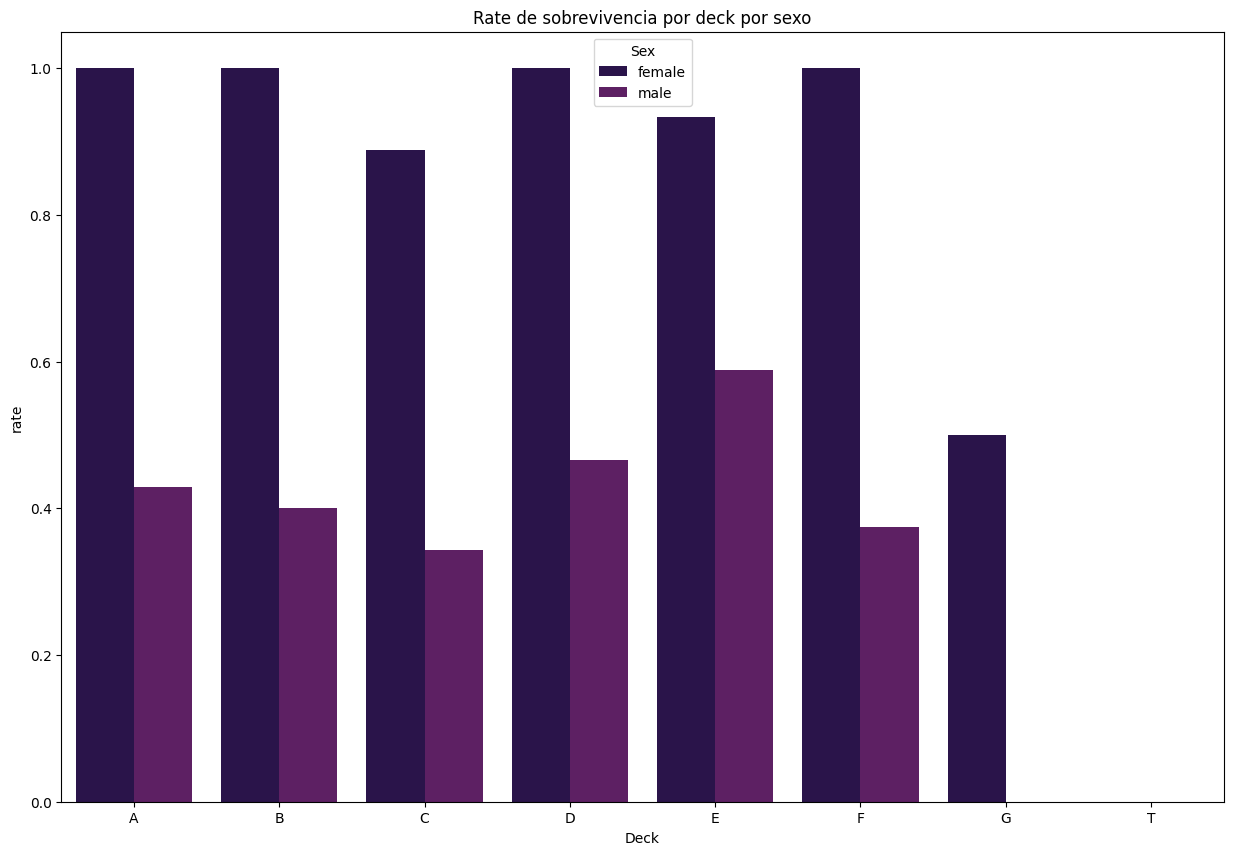

In [ ]:
plt.figure(
    figsize=(15,10)
)
ax = sns.barplot(x = 'Deck', y = 'rate', data = deck_sex_survival, hue = 'Sex');
ax.set_title('Rate de sobrevivencia por deck por sexo');

Conclusão: O rate de sobrevivencia muda de acordo com o deck que a pessoa está

#### Qual era a distribuição de classes sociais por deck?

In [ ]:
deck_class_count = data.groupby(['Deck', 'Pclass']).count()['Survived'].reset_index()
deck_class_count = deck_class_count.loc[deck_class_count['Deck'] != 'N'].copy()
deck_class_count.head()

,Deck,Pclass,Survived
0,A,1,15
1,B,1,47
2,C,1,59
3,D,1,29
4,D,2,4


In [ ]:
deck_count = data.groupby('Deck').count()['Survived'].reset_index()
deck_count.head()

,Deck,Survived
0,A,15
1,B,47
2,C,59
3,D,33
4,E,32


In [ ]:
deck_class = deck_class_count.merge(deck_count, on = 'Deck').rename({'Survived_x': 'class_count', 'Survived_y': 'deck_total'}, axis = 1)
deck_class['rate'] = deck_class['class_count'] / deck_class['deck_total']
deck_class

,Deck,Pclass,class_count,deck_total,rate
0,A,1,15,15,1.000000
1,B,1,47,47,1.000000
2,C,1,59,59,1.000000
3,D,1,29,33,0.878788
4,D,2,4,33,0.121212
5,E,1,25,32,0.781250
6,E,2,4,32,0.125000
7,E,3,3,32,0.093750
8,F,2,8,13,0.615385
9,F,3,5,13,0.384615


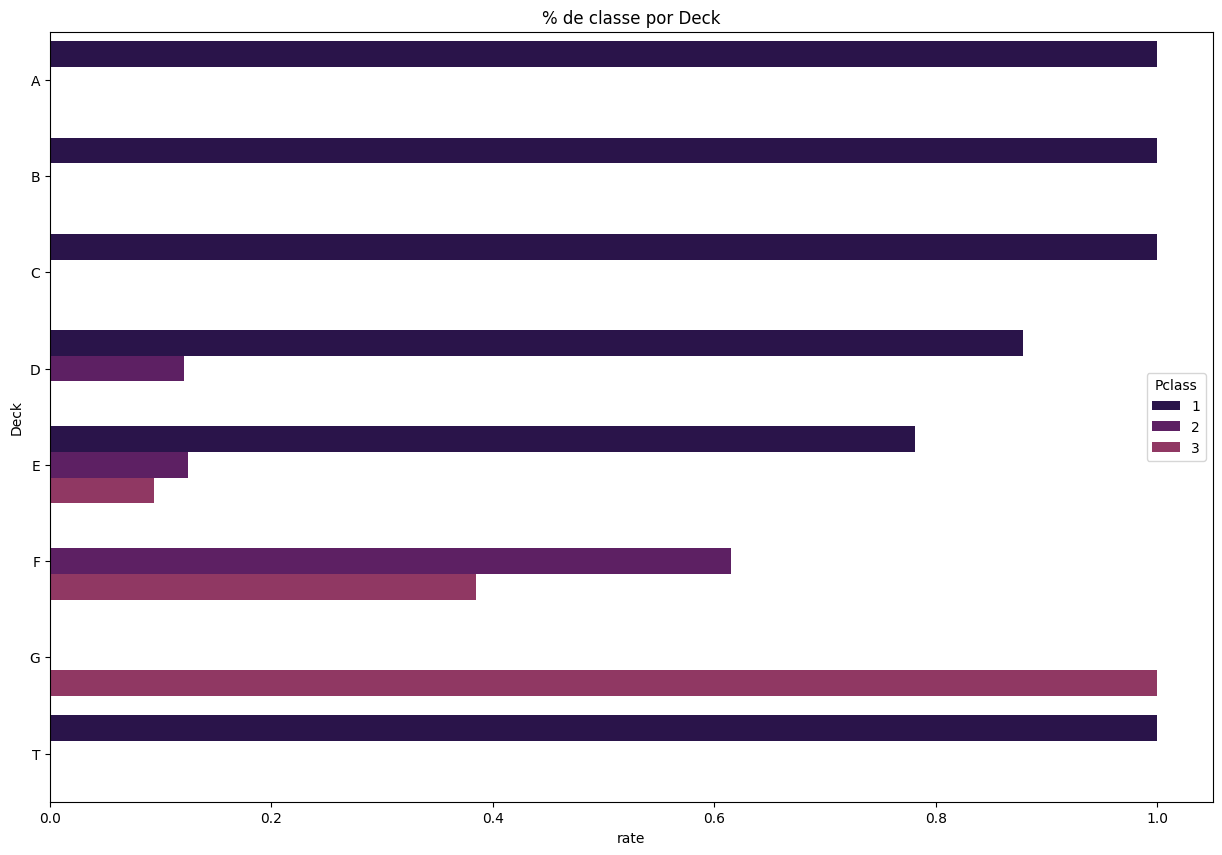

In [ ]:
plt.figure(
    figsize=(15,10)
)
ax = sns.barplot(x = 'rate', y = 'Deck', hue = 'Pclass', data = deck_class);
ax.set_title('% de classe por Deck');

Conclusão: Até o deck C todas as pessoas são de primeira classe, a classe D tem alguns poucos de segunda classe, o mesmo para a classe E que contem também alguns passageiros de terceira classe, por ultimo no deck G todas as pessoas são de terceira classe

#### A quantidade de familiares é uma variavel de impacto?

In [ ]:
family = data['SibSp'] + data['Parch']
family

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [ ]:
corr_parentes_primeiro = np.corrcoef(data['Parch'], data['Survived'])[0][1]
print('A correlação entre sobrevivencia e a quantidade de parentes de primeiro grau é %.2f' % corr_parentes_primeiro)

A correlação entre sobrevivencia e a quantidade de parentes de primeiro grau é 0.08


In [ ]:
corr_parentes_segundo = np.corrcoef(data['SibSp'], data['Survived'])[0][1]
print('A correlação entre sobrevivencia e a quantidade de parentes de segundo grau é %.2f' % corr_parentes_segundo)

A correlação entre sobrevivencia e a quantidade de parentes de segundo grau é -0.04


In [ ]:
corr_parentes_total = np.corrcoef(family, data['Survived'])[0][1]
print('A correlação entre sobrevivencia e a quantidade de parentes de segundo grau é %.2f' % corr_parentes_total)

A correlação entre sobrevivencia e a quantidade de parentes de segundo grau é 0.02


Conclusão: independente do grau a correlação é muito baixa

#### O local de embarque afeta o rate de sobrevivencia?

In [ ]:
embarked = data.groupby('Embarked').agg(['sum', 'count'])['Survived'].reset_index()
embarked['rate'] = embarked['sum'] / embarked['count']
embarked

,Embarked,sum,count,rate
0,C,93,168,0.553571
1,N,2,2,1.000000
2,Q,30,77,0.389610
3,S,217,644,0.336957


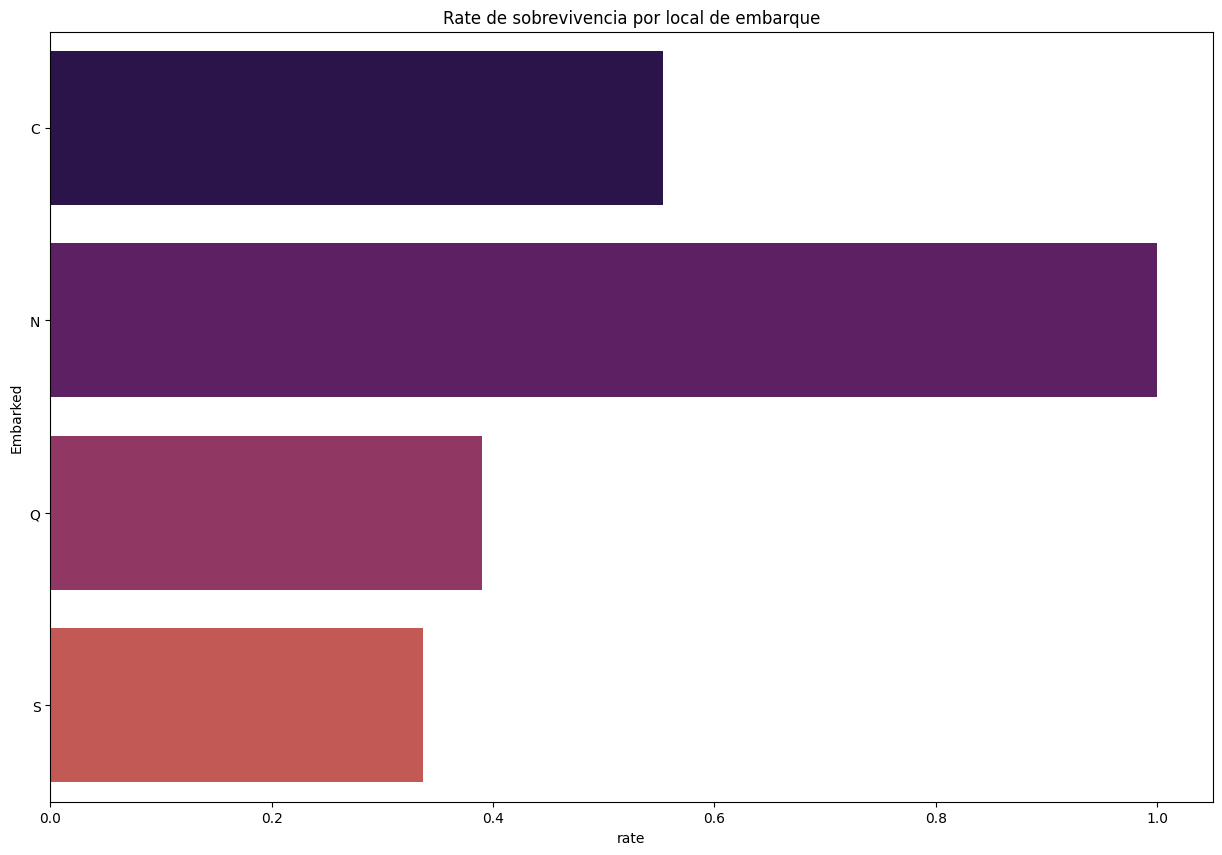

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = 'rate', y = 'Embarked', data = embarked);
ax.set_title('Rate de sobrevivencia por local de embarque');

Conclusão: quem entrou Cherbourg tem um rate maior de sobrevivencia seguido de Queenstown e por último Southampton, portanto essa variável afeta sim o rate de sobrevivencia

#### Passageiros que pagaram mais tem uma chance maior de sobreviver?

In [ ]:
corr_fare_survived = np.corrcoef(data.Fare, data.Survived)[0][1]
print('A correlação entre sobrevivencia e o custo da passagem é: %.2f'% corr_fare_survived)

A correlação entre sobrevivencia e o custo da passagem é: 0.26


Conclusão: Existe uma correlação positiva desprezível entre as duas variáveis, o que significa que estatísticamente o tanto que o custo da passagem afetou a sobrevivencia dos passageiros é despresível

## Modelagem

##### Importando bibliotecas

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#### Preparação dos dados

In [ ]:
cat_columns = ['Embarked', 'Deck']

cat_variables = pd.DataFrame(index = [i for i in range(891)])
for i in cat_columns:
    encoder = OneHotEncoder()
    col = pd.DataFrame(encoder.fit_transform(data[[i]]).toarray(), columns = encoder.get_feature_names_out())
    cat_variables = cat_variables.join(col)

cat_variables.head()

,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data.drop(cat_columns, axis = 1, inplace = True)
data = data.join(cat_variables).copy()
data.replace({'male': 0, 'female': 1}, inplace = True)
data.head()

<ipython-input-40-fce09fe63c44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(cat_columns, axis = 1, inplace = True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,3,0,22.0,1,0,7.2500,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0,35.0,0,0,8.0500,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x = data.drop('Survived', axis = 1).copy()
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, shuffle=True, random_state=100)

#### Treino e validação do modelo

In [ ]:
clf = XGBClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       167
           1       0.79      0.80      0.79       101

    accuracy                           0.84       268
   macro avg       0.83      0.84      0.83       268
weighted avg       0.84      0.84      0.84       268



#### Importancias de Feature

In [ ]:
pd.DataFrame(data = clf.feature_importances_, index = clf.feature_names_in_, columns = ['Importance']).sort_values(by = 'Importance', ascending=False)

,Importance
Sex,0.397265
Pclass,0.116936
SibSp,0.064938
Deck_N,0.064802
Embarked_S,0.055270
Deck_B,0.045954
Deck_E,0.037157
Deck_C,0.034869
Age,0.032389
Parch,0.031402


#### Tunning de híper-parametros

In [ ]:
params = {
    'learning_rate' : [0.005, 0.01, 0.05,0.10,0.15,0.20,0.25,0.30, 0.5],
    'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight' : [ 1, 3, 5, 7 ],
    'n_estimators' : [100, 20, 200, 500, 800],
    'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ],
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs_model=RandomizedSearchCV(clf,param_distributions=params,n_iter=300,scoring='accuracy',n_jobs=-1,cv=3,verbose=False, random_state=100)

In [ ]:
rs_model.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 0.15, 0.2, 0.25,
                                                          0.3, 0.5],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 20, 200, 500,
                                                         800]},
                   random_state=100, scoring='accuracy', verbose=False)

In [ ]:
params = rs_model.best_params_
clf = XGBClassifier(**params)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.78      0.75      0.76       107

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



##### Criando base de validação e aplicando early stopping

In [ ]:
clf = XGBClassifier(**params)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.78      0.75      0.76       107

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



#### Dropando features sem importancia

In [ ]:
importances = pd.DataFrame(data = clf.feature_importances_, index = clf.feature_names_in_, columns = ['Importance']).sort_values(by = 'Importance', ascending=False)
drop_columns = list(importances.loc[importances['Importance'] == 0].index)
importances

,Importance
Sex,0.476649
Pclass,0.142883
Deck_N,0.070023
SibSp,0.069546
Age,0.039770
Parch,0.039693
Fare,0.037910
Embarked_C,0.037869
Embarked_Q,0.031725
Embarked_S,0.030951


In [ ]:
drop_columns.append('Survived')

#### Retreinando o modelo apenas com features importantes

In [ ]:
x = data.drop(drop_columns, axis = 1).copy()
y = data['Survived']

clf = XGBClassifier(**params)
clf.fit(x, y)#, eval_set=[(x_train, y_train), (x_val, y_val)])

from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.78      0.75      0.76       107

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
pred_columns = list(clf.feature_names_in_)

## Criação do arquivo de submissão

In [ ]:
test = pd.read_csv('test.csv')
checa_nulos(test)

,pct_nulls
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234
Cabin,78.229665


In [ ]:
fill_nas(test)
create_deck(test)
test.Fare = test.Fare.fillna(test.Fare.mode())
checa_nulos(test)


,pct_nulls
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234
Cabin,0.000000


In [ ]:
cat_columns = ['Embarked', 'Deck']
id = test['PassengerId']

cat_variables = pd.DataFrame(index = [i for i in range(891)])
for i in cat_columns:
    encoder = OneHotEncoder()
    col = pd.DataFrame(encoder.fit_transform(test[[i]]).toarray(), columns = encoder.get_feature_names_out())
    cat_variables = cat_variables.join(col)

test.drop(cat_columns, axis = 1, inplace = True)
test = test.join(cat_variables).copy()
test = test.set_index(id)
test = test[pred_columns]
test.replace({'male': 0, 'female': 1}, inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Deck_C,Deck_N
PassengerId,,,,,,,,,,,
892,3,0,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
893,3,1,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,1.0
894,2,0,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
895,3,0,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
896,3,1,22.0,1,1,12.2875,0.0,0.0,1.0,0.0,1.0


In [ ]:
preds = clf.predict(test)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test = test.reset_index()[['PassengerId']]
test['Survived'] = preds
test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
test.to_csv('Submission.csv', index = False)